<a href="https://colab.research.google.com/github/TranNgocXuanThanh/tienvnd/blob/main/tienvnd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from os import listdir
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt

# specify the folder here
folder = '/content/drive/MyDrive/tienvnd/'

photos, labels = list(), list()

photos, labels = list(), list()

for file in listdir(folder):
    output = None
    if file.startswith('5kvnd (1)'):
        output = 0
    if file.startswith('10kvnd (1)'):
        output = 1
    if file.startswith('20k'):
        output = 2
    if file.startswith('50k'):
        output = 3
    if file.startswith('100k'):
        output = 4
    if file.startswith('500k'):
        output = 5
    if output is not None:
      photo = load_img(folder + file, target_size=(200, 200, 3))
      photo = img_to_array(photo)
      photos.append(photo)
      labels.append(output)
photos = np.array(photos)
labels = np.array(labels)

# Normalize images
photos= photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,18)

# Save photos and labels to disk
save('/content/drive/MyDrive/tienvnd', photos)
save('/content/drive/MyDrive/tienvnd', labels)

# Define the model
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(18, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=60, epochs=22, verbose=1)

model.evaluate(photos,labels)

Epoch 1/22
2/2 [==============================] - 2s 392ms/step - loss: 7.7060 - accuracy: 0.2037
Epoch 2/22
2/2 [==============================] - 1s 380ms/step - loss: 5.0314 - accuracy: 0.1759
Epoch 3/22
2/2 [==============================] - 1s 379ms/step - loss: 1.9465 - accuracy: 0.3056
Epoch 4/22
2/2 [==============================] - 1s 376ms/step - loss: 2.1705 - accuracy: 0.2315
Epoch 5/22
2/2 [==============================] - 1s 376ms/step - loss: 1.7472 - accuracy: 0.3611
Epoch 6/22
2/2 [==============================] - 1s 371ms/step - loss: 1.7634 - accuracy: 0.3426
Epoch 7/22
2/2 [==============================] - 1s 373ms/step - loss: 1.7320 - accuracy: 0.3148
Epoch 8/22
2/2 [==============================] - 1s 370ms/step - loss: 1.5500 - accuracy: 0.3704
Epoch 9/22
2/2 [==============================] - 1s 376ms/step - loss: 1.5205 - accuracy: 0.4167
Epoch 10/22
2/2 [==============================] - 1s 371ms/step - loss: 1.6248 - accuracy: 0.3704
Epoch 11/22
2/2 [==

[0.48326796293258667, 0.8796296119689941]

In [5]:
model.save('tienvnd.h5')

In [6]:
classes = ['5kvnd (1)','10kvnd (1k)','20k','50k','100k','500k']

1/1 [==============================] - 0s 389ms/step
[[7.5420521e-06 6.3492800e-05 6.0691800e-06 2.3679750e-03 9.8709971e-01
  1.0433380e-02 9.9187432e-09 2.2633923e-08 1.9046149e-05 3.2025409e-07
  1.1723963e-06 5.0288495e-08 3.1175460e-07 1.5327153e-08 5.9515153e-09
  1.3069021e-07 1.8980417e-07 6.8233487e-07]]


'100k'

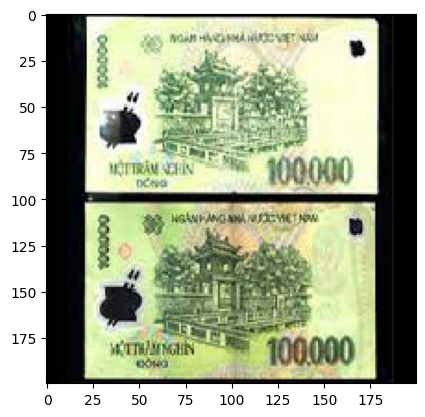

In [7]:
img = load_img('/content/drive/MyDrive/tienvnd/100k (13).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

1/1 [==============================] - 0s 36ms/step
[[6.1190194e-03 7.8982729e-03 5.3156596e-01 5.4567706e-02 8.8096056e-03
  3.7016645e-01 2.6314208e-04 2.4093012e-04 4.2839185e-03 5.0528962e-03
  4.3106492e-04 2.8952383e-03 6.6704722e-04 1.0635963e-03 8.9900999e-04
  1.9669759e-03 1.0698069e-03 2.0393608e-03]]


'20k'

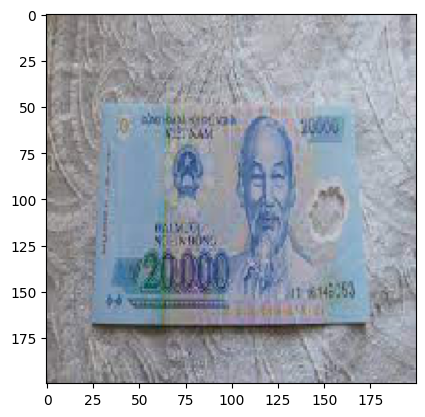

In [9]:
img = load_img('/content/drive/MyDrive/tienvnd/20k (1).jpg', target_size=(200,200))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3) 
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]